# Notebook for matching magnitude distributions of stars/qso
Since we have more stars than we need, choose the ones that best match the mag distribution of the quasars to make a sensible control sample for the qsos

In [2]:
import pandas as pd
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt

In [4]:
t = Table.read('/disk1/hrb/python/data/surveys/ztf/calibStars/calibStars_ztf.txt', format='ipac', include_names = ['uid_s_01','dist_x', 'oid', 'ngoodobsrel', 'maxmag', 'minmag', 'medianmag', 'filtercode'])

In [5]:
df=t[~t.mask['oid']].to_pandas(index='uid_s_01')
df=df[df['ngoodobsrel']>0]
df['filtercode'] = df['filtercode'].str[-1]

In [6]:
df.loc[:,'mag_ptp']=df['maxmag']-df['minmag']

In [3]:
uids = pd.read_csv('../data/catalogues/calibStars/calibStars_uids_distn_matched.csv',index_col=0,names=['uid'])

In [8]:
df = df.loc[uids[uids.index.isin(df.index.unique())].index] #remove uids that show up in s82 sdss stars that do not appear in ztf

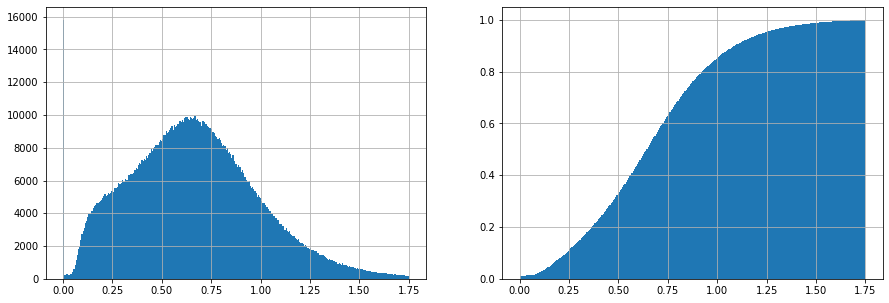

In [9]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
df['mag_ptp'].hist(range = (0,1.75), bins=300, ax=ax[0])
df['mag_ptp'].hist(range = (0,1.75), bins=300, cumulative=True, density=True, ax=ax[1])

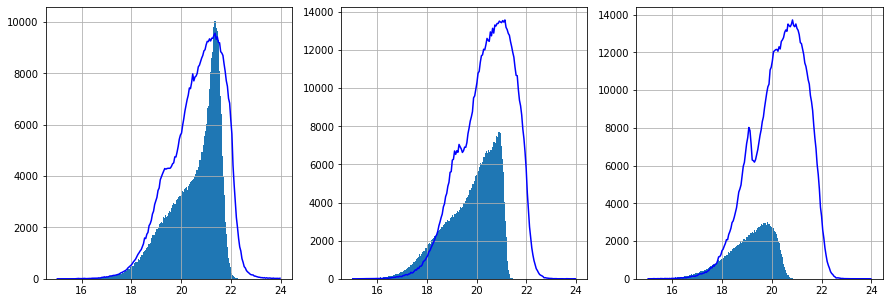

In [14]:
scaling_dict = {'g':24000,'r':35500,'i':35500}
fig, ax = plt.subplots(1,3,figsize=(15,5))
for i, band in enumerate('gri'):
    scaling = scaling_dict[band]
    subdf = df[df['filtercode']==band]
    mask =  ~subdf.index.duplicated(keep='first')
    subdf.loc[mask,'medianmag'].hist(range = (15,24), bins=300, ax=ax[i])
#     n, bins = np.histogram(sdss[band + '_mmu'], bins=200,range=(15,24))
    n_qso, bins_qso = pd.read_csv('computed/qso_mag_dist_nbins_{}.csv'.format(band)).values.T
    n_qso = n_qso[:-1]
    ax[i].plot(0.5*(bins_qso[:-1]+bins_qso[1:]),n_qso*scaling, color = 'b', label = 'qsos')

In [10]:
np.savetxt('/disk1/hrb/python/data/surveys/ztf/calibStars/calibStars_oids.txt',df['oid'].values, fmt='%i')

In [ ]:
df[df['mag_ptp']<0.2]['oid'].to_csv('/disk1/hrb/python/data/surveys/ztf/calibStars/calibStars_oids_uids.csv')

In [11]:
np.savetxt('/disk1/hrb/python/data/surveys/ztf/calibStars/calibStars_oids.txt',df[df['mag_ptp']<0.25]['oid'].values, fmt='%i')

Remember - ztf one to one match does NOT work, ztf oid is specific to a single band. We need to do many to one match within 1".
Run code below to find oids that we are missing.
Note that when we do a one to many match we may pick up unwanted neighbouring objects. To remove these, sort by dist_x and remove oid duplicates (keep='first').

In [6]:
t = Table.read('/disk1/hrb/python/data/surveys/ztf/calibStars/calibStars_ztf.txt', format='ipac', include_names = ['uid_s_01','dist_x', 'oid', 'ngoodobsrel', 'maxmag', 'minmag'])

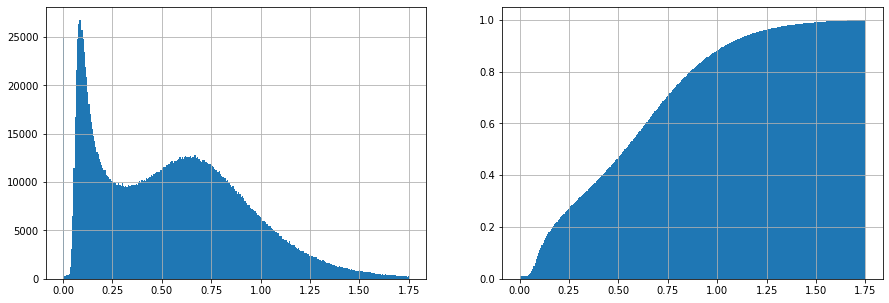

In [12]:
df=t.to_pandas(index='uid_s_01')
df=df[df['ngoodobsrel']>0]
df.loc[:,'mag_ptp']=df['maxmag']-df['minmag']
fig, ax = plt.subplots(1,2,figsize=(15,5))
df['mag_ptp'].hist(range = (0,1.75), bins=300, ax=ax[0])
df['mag_ptp'].hist(range = (0,1.75), bins=300, cumulative=True, density=True, ax=ax[1])

In [13]:
df = df.sort_values('dist_x')
df = df[~df['oid'].duplicated(keep='first')]

In [14]:
assert df['oid'].is_unique

In [15]:
df[df['mag_ptp']<0.2]['oid'].to_csv('/disk1/hrb/python/data/surveys/ztf/calibStars/calibStars_oids_uids.csv')

In [97]:
oids = df[df['mag_ptp']<0.2]['oid'].values

In [67]:
oids_1to1 = np.loadtxt('/disk1/hrb/python/data/surveys/ztf/calibStars/calibStars_oids_1to1.txt',dtype=np.uint64)

In [76]:
oids_diff = np.setdiff1d(oids, oids_1to1)

In [99]:
np.savetxt('/disk1/hrb/python/data/surveys/ztf/calibStars/calibStars_oids.txt',oids,fmt='%i')